<a href="https://colab.research.google.com/github/srivaninagunuri/Demo/blob/main/SingapureFlatprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Corrected import for matplotlib.pyplot
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm
from wordcloud import WordCloud  # Corrected import for WordCloud
import plotly.express as px
import joblib
import matplotlib.patches as mpatches
import plotly.graph_objects as go  # Corrected import for plotly.graph_objects
import calendar
 from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Corrected import for StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  # Corrected import for Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import math  # Corrected import for math


In [ ]:
!pip install wordCloud

In [ ]:
df1 = pd.read_csv("/content/ResaleFlatPricesBasedonApprovalDate19901999 (1).csv")

In [ ]:
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0
...,...,...,...,...,...,...,...,...,...,...
160233,1997-06,BEDOK,3 ROOM,115,BEDOK NTH RD,04 TO 06,73.0,NEW GENERATION,1978.0,202000.0
160234,1997-06,BEDOK,3 ROOM,125,BEDOK NTH RD,07 TO 09,67.0,NEW GENERATION,1978.0,206000.0
160235,1997-06,BEDOK,3 ROOM,124,BEDOK NTH RD,10 TO 12,67.0,NEW GENERATION,1978.0,200000.0
160236,1997-06,BEDOK,3 ROOM,122,BEDOK NTH ST 2,07 TO 09,67.0,NEW GENERATION,1978.0,205000.0


In [ ]:
df2 = pd.read_csv("/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012 (2).csv")

In [ ]:
df2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [ ]:
df3 = pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")

In [ ]:
df3

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [ ]:
df4 = pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014 (1).csv")

In [ ]:
df4

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [ ]:
df5 = pd.read_csv("/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv")

In [ ]:
df5

In [ ]:
import numpy as np

# Replace NaN values with 0 (or any other default value)
df5['remaining_lease'] = df5['remaining_lease'].fillna('0 years')

# Extract numeric part, split by space, and convert to integer
df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype('int64')


In [ ]:
#merging datasets df1, df2, df3, df4, df5
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


In [ ]:
df_combined

In [ ]:
#spliting month column into month and year seperatly
df_combined[['year','month']] = df_combined['month'].str.split('-', expand=True)

#convert year and month columns to numeric types if needed
df_combined['year'] = pd.to_numeric(df_combined['year'])
df_combined['month'] = pd.to_numeric(df_combined['month'])

In [ ]:
df_combined

3 datasts do not having the 'remaining_lease' and thus when we merged all 5 datasetstogether we have Nan values on those rows. We use the below formula to obtain the values for those Nan values.

remaining lease = 99-(Year-lease commence date)

In [ ]:
import pandas as pd
from datetime import datetime


current_year = datetime.now().year

# Calculate remaining_lease
df_combined['remaining_lease'] = df_combined['remaining_lease'].fillna(90 - (current_year - df_combined['lease_commence_date']))

# Now check the DataFrame or perform further operations
print(df_combined.head())


     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            31.0        IMPROVED               1977.0        9000.0   
1            31.0        IMPROVED               1977.0        6000.0   
2            31.0        IMPROVED               1977.0        8000.0   
3            31.0        IMPROVED               1977.0        6000.0   
4            73.0  NEW GENERATION               1976.0       47200.0   

   remaining_lease  \
0             43.0   
1             43.0   
2             43.0   
3             43.0   
4             42.0

In [ ]:
#calculate remaining lease for rows with values
df_combined['remaining_lease'].fillna(90 - (df_combined['year'] - df_combined['lease_commence_date']), inplace=True)

KeyError: 'year'

In [ ]:
df_combined

In [ ]:
#changing the case to uppercase for consistency
df_combined['flat_model'] = df_combined['flat_model'].str.upper()

In [ ]:
df_combined

In [ ]:
#converting flat type values into lower case
df_combined['flat_type'] = df_combined['flat_type'].str.lower()

#Standedize values to a common set of categories
type_mapping = {
    '1 room': '1 room',
    '3 room': '3 room',
    '4 room': '4 room',
    '5 room': '5 room',
    '2 room': '2 room',
    'executive': 'executive',
    'multi generation': 'multi generation',
    'multi generation': 'multi generation'
}

df_combined['flat_type'] = df_combined['flat_type'].map(type_mapping)

# changing the case to upper case
df_combined['flat_type'] = df_combined['flat_type'].str.upper()

In [ ]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,77.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,77.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,77.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,77.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,76.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
703797,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987.0,855000.0,62.0,2024
703798,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988.0,900000.0,62.0,2024
703799,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988.0,805000.0,62.0,2024
703800,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987.0,998000.0,62.0,2024


In [ ]:
# Convert 'remaining_lease' column to numeric type
df_combined['remaining_lease'] = pd.to_numeric(df_combined['remaining_lease'], errors='coerce')

# Create a boolean mask to identify rows containing any of the specified values
mask = df_combined['remaining_lease'] > 99

# Use the boolean mask to drop rows
df_combined = df_combined[~mask]


In [ ]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,77.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,77.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,77.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,77.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,76.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
703797,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987.0,855000.0,62.0,2024
703798,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988.0,900000.0,62.0,2024
703799,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988.0,805000.0,62.0,2024
703800,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987.0,998000.0,62.0,2024


In [ ]:
#drop rows where the 'story_range' column contains specific values
values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 T0 30', '31 TO 35', '36 TO 40']

#create a boolean mask to identify rows containing any of the specified values
mask = df_combined['storey_range'].isin(values_to_drop)

#Use the boolean mask to drop rows
df_combined = df_combined[~mask]

In [ ]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,77.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,77.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,77.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,77.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,76.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
703797,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987.0,855000.0,62.0,2024
703798,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988.0,900000.0,62.0,2024
703799,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988.0,805000.0,62.0,2024
703800,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987.0,998000.0,62.0,2024


In [ ]:
import pandas as pd

# Check for anomalies in 'storey_range'
anomaly_position = 160237
print(df_combined.iloc[anomaly_position]['storey_range'])

# Split 'storey_range' into lower and upper bounds
df_combined[['lower_bound', 'upper_bound']] = df_combined['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        # Handle specific cases where value cannot be converted
        return None

df_combined['lower_bound'] = df_combined['lower_bound'].apply(convert_to_numeric)
df_combined['upper_bound'] = df_combined['upper_bound'].apply(convert_to_numeric)


19 TO 21


<ipython-input-28-1c4de8fbe41b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined[['lower_bound', 'upper_bound']] = df_combined['storey_range'].str.split(' TO ', expand=True)
<ipython-input-28-1c4de8fbe41b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined[['lower_bound', 'upper_bound']] = df_combined['storey_range'].str.split(' TO ', expand=True)
<ipython-input-28-1c4de8fbe41b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [ ]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,77.0,1990,10.0,12.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,77.0,1990,4.0,6.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,77.0,1990,10.0,12.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,77.0,1990,7.0,9.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,76.0,1990,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703797,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987.0,855000.0,62.0,2024,7.0,9.0
703798,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988.0,900000.0,62.0,2024,4.0,6.0
703799,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988.0,805000.0,62.0,2024,4.0,6.0
703800,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987.0,998000.0,62.0,2024,4.0,6.0


In [ ]:
# Adding a new column 'price_per_sqm'
df_combined['price_per_sqrm'] = df_combined['resale_price'] / df_combined['floor_area_sqm']

# Adding a new column 'year_holding'
df_combined['year_holding'] = df_combined['year'] - df_combined['lease_commence_date']


#Adding a new Column 'Current_remaining_lease'
df_combined['current_remaining_lease'] = df_combined['remaining_lease'] - (2024 - df_combined['year']
                                                                           )

<ipython-input-30-ceac027e3c08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['price_per_sqrm'] = df_combined['resale_price'] / df_combined['floor_area_sqm']
<ipython-input-30-ceac027e3c08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['year_holding'] = df_combined['year'] - df_combined['lease_commence_date']
<ipython-input-30-ceac027e3c08>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [ ]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqrm,year_holding,current_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,77.0,1990,10.0,12.0,290.322581,13.0,43.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,77.0,1990,4.0,6.0,193.548387,13.0,43.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,77.0,1990,10.0,12.0,258.064516,13.0,43.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,77.0,1990,7.0,9.0,193.548387,13.0,43.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,76.0,1990,4.0,6.0,646.575342,14.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703797,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987.0,855000.0,62.0,2024,7.0,9.0,6021.126761,37.0,62.0
703798,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988.0,900000.0,62.0,2024,4.0,6.0,6164.383562,36.0,62.0
703799,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988.0,805000.0,62.0,2024,4.0,6.0,5669.014085,36.0,62.0
703800,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987.0,998000.0,62.0,2024,4.0,6.0,6085.365854,37.0,62.0


In [ ]:
# Saving the cleaned dataset to a file
df_combined = df_combined.reset_index(drop=True)

#Use the boolean mask to drop rows_price
df_combined.to_csv('Singapure_resale_flat_prices_updated.csv', index=False)

In [ ]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqrm,year_holding,current_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,77.0,1990,10.0,12.0,290.322581,13.0,43.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,77.0,1990,4.0,6.0,193.548387,13.0,43.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,77.0,1990,10.0,12.0,258.064516,13.0,43.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,77.0,1990,7.0,9.0,193.548387,13.0,43.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,76.0,1990,4.0,6.0,646.575342,14.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696998,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987.0,855000.0,62.0,2024,7.0,9.0,6021.126761,37.0,62.0
696999,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988.0,900000.0,62.0,2024,4.0,6.0,6164.383562,36.0,62.0
697000,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988.0,805000.0,62.0,2024,4.0,6.0,5669.014085,36.0,62.0
697001,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987.0,998000.0,62.0,2024,4.0,6.0,6085.365854,37.0,62.0


In [ ]:
#Reading the  dataset
df = pd.read_csv('Singapure_resale_flat_prices_updated.csv')

#Display basic information about the dataset
print(df.info())

#Display summery statistics of numerical columns
print(df.describe())

#Display the first few rows of the datset
print(df.head())

#Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697003 entries, 0 to 697002
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    697003 non-null  int64  
 1   town                     697003 non-null  object 
 2   flat_type                696744 non-null  object 
 3   block                    697002 non-null  object 
 4   street_name              697002 non-null  object 
 5   storey_range             697002 non-null  object 
 6   floor_area_sqm           697002 non-null  float64
 7   flat_model               697002 non-null  object 
 8   lease_commence_date      697002 non-null  float64
 9   resale_price             697002 non-null  float64
 10  remaining_lease          697002 non-null  float64
 11  year                     697003 non-null  int64  
 12  lower_bound              697002 non-null  float64
 13  upper_bound              697002 non-null  float64
 14  pric

In [ ]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqrm,year_holding,current_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,77.0,1990,10.0,12.0,290.322581,13.0,43.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,77.0,1990,4.0,6.0,193.548387,13.0,43.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,77.0,1990,10.0,12.0,258.064516,13.0,43.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,77.0,1990,7.0,9.0,193.548387,13.0,43.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,76.0,1990,4.0,6.0,646.575342,14.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696998,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987.0,855000.0,62.0,2024,7.0,9.0,6021.126761,37.0,62.0
696999,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988.0,900000.0,62.0,2024,4.0,6.0,6164.383562,36.0,62.0
697000,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988.0,805000.0,62.0,2024,4.0,6.0,5669.014085,36.0,62.0
697001,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987.0,998000.0,62.0,2024,4.0,6.0,6085.365854,37.0,62.0


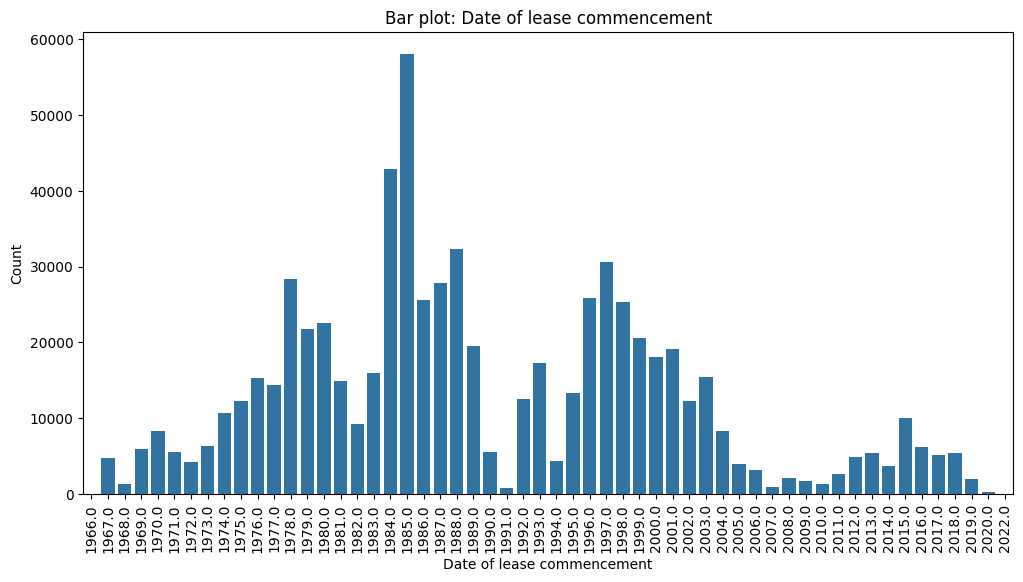

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

plt.figure(figsize=(12, 6))
sns.countplot(x='lease_commence_date', data=df)
plt.title('Bar plot: Date of lease commencement')
plt.xlabel('Date of lease commencement')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


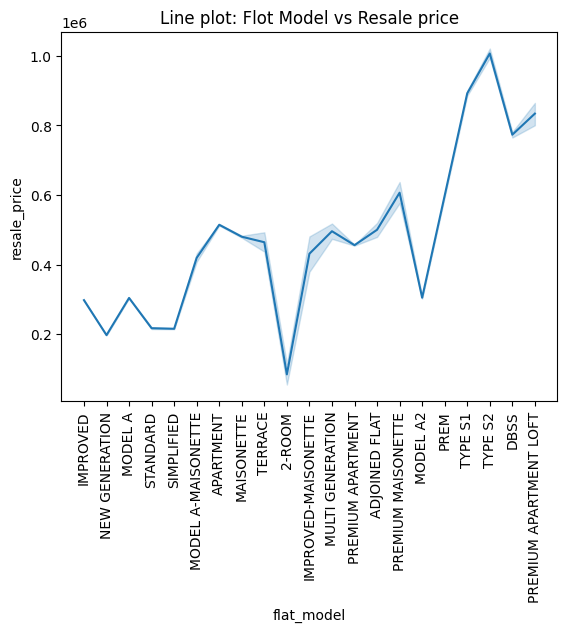

In [ ]:
#Line plot
#print(df.columns)

sns.lineplot(x='flat_model', y='resale_price', data=df)
plt.title('Line plot: Flot Model vs Resale price')
plt.xticks(rotation=90)
plt.show()

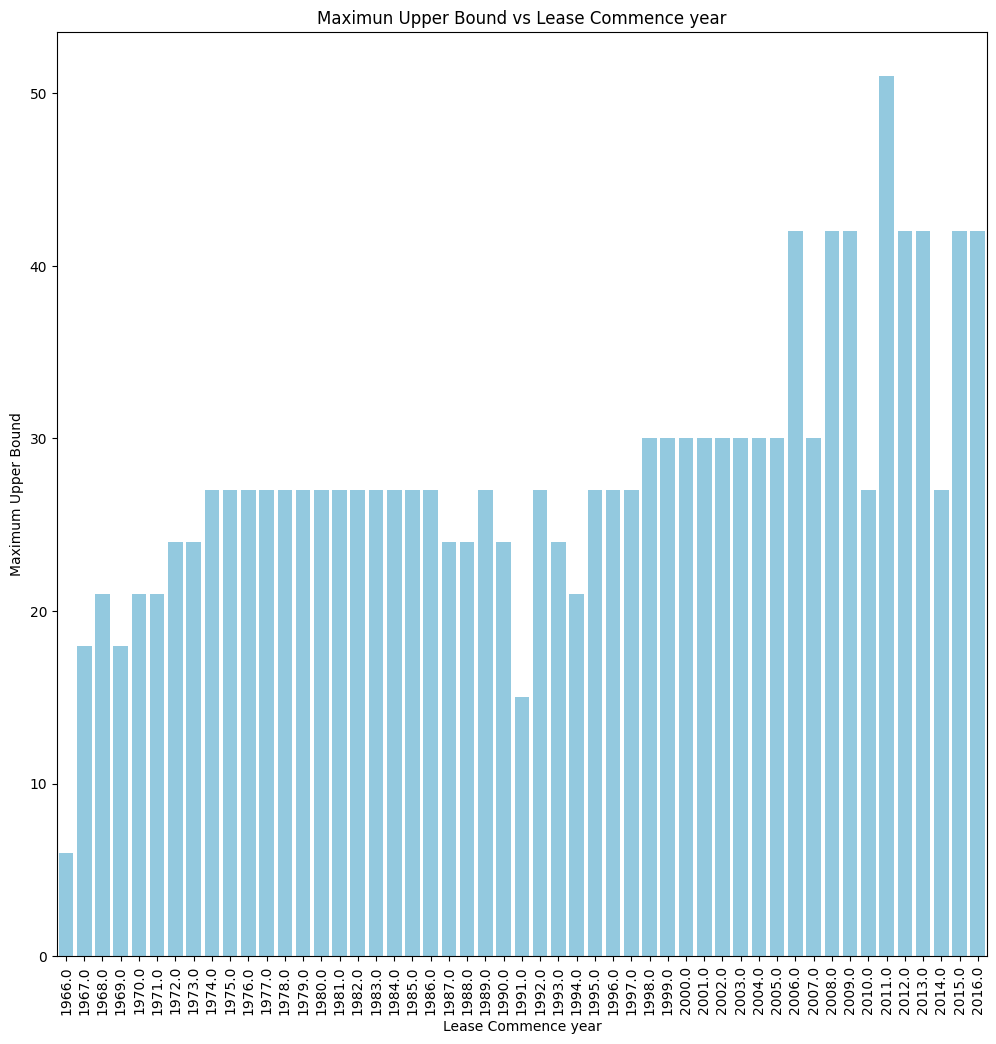

In [ ]:
plt.figure(figsize=(12, 12))

#Group by lease_commence_year and find the maximun value of upper_bound for each group
max_upper_bound = df.groupby('lease_commence_date')['upper_bound'].max().reset_index()

#Create a bar plot using seaborn
sns.barplot(x='lease_commence_date', y='upper_bound', data=max_upper_bound,color='skyblue')

#Set plot label and title
plt.title('Maximun Upper Bound vs Lease Commence year')
plt.xlabel('Lease Commence year')
plt.ylabel('Maximum Upper Bound')
plt.xticks(rotation=90)

#show the plot
plt.show()

Model Building and Evaluation

Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the relevant columns
#--->1:DATA PREPARATION
selected_columns = ['year', 'flat_type', 'flat_model', 'storey_range', 'floor_area_sqm',
                    'lease_commence_date', 'remaining_lease', 'current_remaining_lease',
                    'year_holding', 'resale_price']
dftrain = df[selected_columns]

# Separate feature (X) and target variable (y)
X = dftrain.drop('resale_price', axis=1)  # Features
y = dftrain['resale_price']                # Target variable

# Check for and handle missing values in X and y
missing_values_X = X.isnull().sum()
missing_values_y = y.isnull().sum()

# Drop rows with NaN values in both X and y
#2:--->HANDLING MISSING VALUES in X AND y
combined_df = pd.concat([X, y], axis=1)
combined_df_cleaned = combined_df.dropna()
X_cleaned = combined_df_cleaned.drop('resale_price', axis=1)
y_cleaned = combined_df_cleaned['resale_price']

# Split the cleaned data into training and testing sets
#Step 4: SPLIT THE DATA INTO TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
#Step 5: DEFINE PROCCESSING STEPS AND PIPELINE
numeric_features = ['floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'current_remaining_lease', 'year_holding']
categorical_features = ['year', 'flat_type', 'flat_model', 'storey_range']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numeric and categorical transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Instantiate the regression model
model = LinearRegression()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the preprocessed training data
#Step 6: FIT THE PIPELINE
pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
score = pipeline.score(X_test, y_test)
print(f"R^2 score: {score:.2f}")


R^2 score: 0.89


Decision trees

# K-Nearest neighbers

In [ ]:
#Create the regression model
model = KNeighborsRegressor()

#Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor ),('model', model)])

#Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['floor_area_sqm',
                                                   'lease_commence_date',
                                                   'remaining_lease',
                                                   'current_remaining_lease',
                                                   'year_holding']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['year', 'flat_type',
                                                   'flat_model',
                                                   'storey_range'])])),
                ('model', KNeighborsRegressor())])

In [ ]:
#Predictions on the test set
y_pred = pipeline.pridict(X_test)

#Evalute the Model
mae = mean_absolute_error(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)


AttributeError: 'Pipeline' object has no attribute 'pridict'

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np  # Import numpy for sqrt function

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Use np.sqrt() to calculate RMSE
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")





Mean Absolute Error (MAE): 29260.45
Mean Squared Error (MSE): 2007702199.06
Root Mean Squared Error (RMSE): 44807.39
R^2 Score: 0.92
Explained Variance Score: 0.92
